<a href="https://colab.research.google.com/github/Raymondgwangryeol/Raymondgwangryeol/blob/main/Study/ML/PytorchTutorial/pytorchtutorial_2_dataset_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset과 Dataloader**


---


데이터 샘플을 알맞게 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있다. 때문에, 데이터 셋 코드와 모델 학습 코드를 분리하는 게 가독성(readability), 모듈성(modularity)측면에서 이상적이다.
 <br>     
 Pytorch는 ***torch.utils.data.Dataloader***와 ***torch.utils.data.Dataset***이라는 두가지 테이터 기본 요소를 제공하여, 새로운 데이터 셋 뿐 아니라, 미리 준비된(pre=loaded)데이터 셋도 다룰 수 있게 한다.

>**Dataset:** 샘플과 정답(label) 저장
**Dataloader:** Dataset에 쉽게 접근할 수 있게 iterable한 객체로 감싸는 거

 <br>
Pytorch의 FashionMNIST같은 도메인 특화 라이브러리들은 다양한 **pre-loaded dataset을 제공**한다.    

***torch.utils.data.Dataset***의 하위 클래스에는 미리 제공된 데이터셋과, 개별 데이터를 측정하는 함수가 구현되어 있다.   
이런 데이터 셋은 모델을 만들어보고(prototype), 성능 측정(benchmark)하는데 사용할 수 있다.

## **데이터셋 불러오기**

*TorchVision에서 Fashion-MNIST 불러오기*
 <br>

**Fashion-MNIST Dataset:**   
>60000개의 학습 예제, 10000개의 테스트 예제로 이루어짐.   
**Input data -** 흑백(grayscale)의 28*28 이미지
10개로 분류, 정답(label)은 10개 분류 중 하나.

다음 매개변수들을 사용해 FashionMNIST 데이터셋을 불러온다.
- **root:** 데이터가 저장되는 경로
- **train:** true면 학습용, false면 테스트용
- **download=True:** root에 데이터가 없으면 인터넷에서 내려받기
- **transform, target_transform**: 각각 특징(feature)과 정답(label)의 변형(transform)을 지정

transform은 데이터의 형태를 바꿔주는 것.

정규화된 텐서 형태가 필요할 때 transform으로 형태를 지정해주고, 해당 모양으로 바꿀 수 있음.

In [ ]:
import torch
from torch.utils.data import Dataset #torchvision: 파이토치에서 제공하는 데이터셋들이 모여있는 패키지
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18176798.71it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 339866.14it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6192471.17it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 484305.51it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## **데이터셋을 순회하고 시각화하기**
리스트처럼, Dataset에도 직접 접근(index) 가능함.

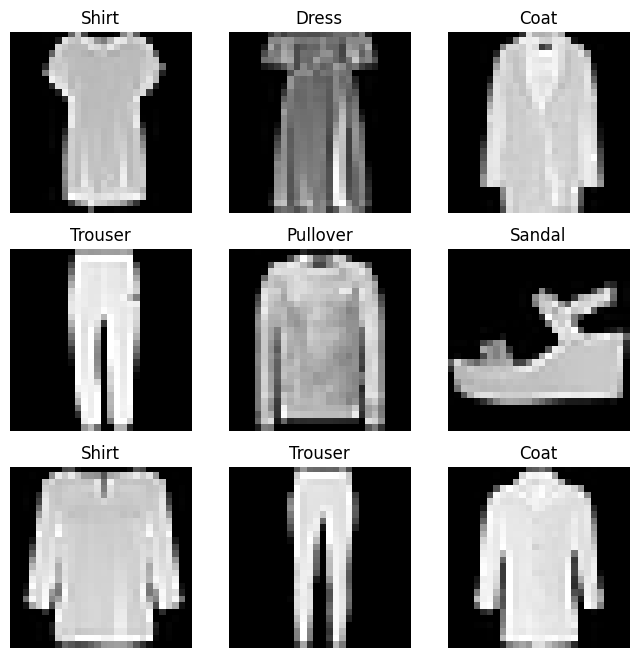

In [ ]:
#FashionMNIST training set에서 아무거나 9개 뽑은다음 그림이랑 label랑 lmage랑 함께 출력해보자

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
} #오 label을 딕셔너리로 만들었네

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3

for i in range(1, cols * rows + 1): #figure 안에 subplot을 9개를 만들거임.
    sample_idx = torch.randint(len(training_data), size=(1,)).item() #randint: int형 난수를 집어넣어 torch 만들건데
                                                                     #len(training_data) 60000 미만의 난수를 만들거임
                                                                     #low값인 0은 생략된 것 같다(default가 0이어서)
                                                                     #size=(1,) 사이즈는 그냥 일차원짜리 한 개만 주세요
                                                                     #size=(2,2)하면 행2, 열2인 2차원 배열 모양으로 만들겠다는 뜻.
                                                                     #item() 내용물만 주십쇼
                                                                     #즉, 임의 인덱스 값 하나를 뽑아내는 코드임.
    img, label = training_data[sample_idx] #img와 label에 training_data의 임의 인덱스에 들어있는 data를 집어넣음.
                                           #img에는 image data(tensor), label에는 해당 data의 라벨값(int) 저장
                                           #아 이거 딕셔너리구나..
                                           #img => [1,28,28]임. 이미지 한 장이 있는데, 이걸 28개로 잘라놓고, 잘라놓은 28개 조각의 특징들이 28개임.

    figure.add_subplot(rows, cols, i) #.add_subplot(행의 수, 열의 수, 위치)
    plt.title(labels_map[label]) #label 번호에 매핑된 라벨명을 title로
                                 #Dataset에 직접 접근(index)
    plt.axis("off") #x축, y축은 필요 없습니다

    plt.imshow(img.squeeze(), cmap="gray") #image show해주세요.
                                           #image는 3차원이니까 2차원 만들어야 함.([28,28]) 1차원 모두 없애주시고(squeeze)
                                           #colormap은 gray로 해주세요(cmap="gray")
                                           #colormap 약간 다양한 종류의 팔레트? 라고 생각하셈
plt.show() #colab은 show안해도 알아서 출력해주긴 한다.

# Axes : 그래프가 그려지는 좌표 평면

## **파일에서 사용자 정의 데이터셋 만들기**

사용자 정의 Dataset 클래스는 반드시 다음 3가지 함수를 구현해야 함.

1. **\_\_init__**
    >Dataset 객체가 생성(instantiate)될 때 한 번만 실행.
    클래스 초기화.
2.**\_\_len__**
    >데이터셋의 샘플 개수를 반환
3. **\_\_getitem__**
    >주어진 인덱스에 해당하는 샘플을 데이터셋에서 불러오고 반환함.

In [ ]:
#FashionMNIST 이미지들은 img_dir 디렉토리에 저장되고,
#정답은 annotations_file.csv에 별도로 저장됨.

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):

    #__init__
    #이미지와 주석(라벨)파일(annotation_file) 읽어오고,
    #해당 파일이 있는 디렉토리 경로, transform 정의 초기화하는 코드
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label']) #read_csv => 리턴값 2차원의 자료형 data frame임
                                                                                      #DataFrame: Pandas의 여러 Row와 Column으로 구성된 2차원 형태의 자료구조(like excel)
                                                                                      #name => 칼럼 이름 정해주는 거
                                                                                      #labels.csv 파일에 "tshirt1.jpg, 0" 이런 형식으로 저장되어있음.
        self.img_dir = img_dir
        #transform (callable, optional): A function/transform that  takes in an PIL image
        # and returns a transformed version. E.g, ``transforms.RandomCrop``
        #target_transform (callable, optional): A function/transform that takes in the
        #target and transforms it.
        self.transform = transform
        self.transform_target = target_transform


    #__len__
    #파일 각각의 이름과 라벨값이 들어있는 csv파일을 읽어와서 img_labels에 넣음. 모든 데이터의 정보가 들어있다는 소리.
    #len(img_label)로 파일의 개수를 반환
    def __len__(self):
        return len(self.img_labels)


    #__getitem__(self, idx)
    #주어진 인덱스인 idx에 해당되는 샘플을 데이터셋에서 불러오고 반환함.
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) #os.path.join: 인수에 전달된 2개의 문자열을 결합해서 하나의 경로로!
                                                                            #os모듈 import해야 함
                                                                            #pandas의 iloc: integer location의 약어
                                                                            #               data frame의 행이나 칼럼의 순서를 나타내는 정수로 특정값을 추출
                                                                            #               df.iloc[행 인덱스, 열 인덱스]
                                                                            #img_labels.iloc[idx, 0] => 해당 인덱스의 data의 파일명
        image = read_image(img_path) #torchvision.io.read_image: Reads a JPEG or PNG image into a 3 dimensional RGB or grayscale Tensor
        label = self.img_labels.iloc[idx, 1] #img_labels 데이터 프레임에서 idx번째 label
        if self.transform:
            image = self.transform(image) #callable(호출 가능한 인스턴스, 메서드등의 객체)에 image를 넣는 듯
        if self.target_transform:
            label = self.target_transform(label)#얘도 callable에 label 넣고
        sample = {"image": image, "label": label}
        return sample


## **DataLoader로 학습용 데이터 준비하기**


**Dataset**은 데이터셋의 **feature**를 가져오고, **하나의 sample에 label을 지정**하는 일을 한 번에 함.
 <br>  <br>
모델 학습할 때, 일반적으로 sample들을 minibatch로 전달하고, epoch마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing을 사용해 데이터 검색 속도를 높이는 과정을 진행하려고 함.   
이런 복잡한 과정들을 간단한 API로 추상화한 **순회 가능한 객체**(iterable)가 바로 **DataLoader**!

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)#sample들을
                                                                        #크기 64인 배치로 전달,
                                                                        #매 epoch마다 데이터 shuffle
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


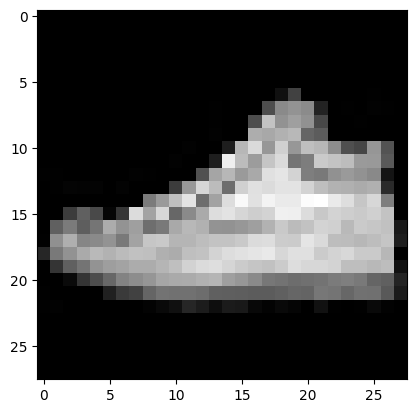

Label: 9


In [ ]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader)) #iter: iterable한 데이터 타입 객체를 iterator 객체로 만든다
                                                            #iterator: 인덱싱 없이도 객체 안의 element 혹은 member를 순서대로 접근할 수 있음. 순서대로 자료를 가져온 다음에는 해당 데이터를 폐기
                                                            #       =>메모리 사용에 제약이 있는 대규모 데이터 처리에 효과적이다
                                                            #next(): iterator의 element를 순서대로 하나씩 가져오는 메서드
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

#일단 0번째 데이터를 봐 보자
img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()

print(f"Label: {label}")